# Síntese da primeira semana do terceiro experimento

Grupo GD18

## Arranjo experimental

Para essa semana, o arranjo utilizado consiste em

* Motor de passo para webcam
* Câmera USB modelo Philips SPC530NC
* Lâmpada de mércurio
* Arranjo de fenda para refratar a luz

## Procedimento experimental

Inicialmente, identifica-se o intervalo em passos no qual estão contidos os picos de intensidade. Ao explorar livremente com a câmera, foram encontrados 17 picos de intensidade de luz nos seguintes valores aproximados de passos e cores em parênteses:

<table>
    <tr>
        <td>2200 (vermelho, moderado)</td>
        <td>3200 (vermelho, moderado)</td>
        <td>4500 (vermelho, fraco)</td>
        <td>7600 (vermelho, quase ruído)</td>
        <td>8000 (vermelho, fraco)</td>
        <td>9400 (vermelho, quase ruído)</td>
        <td>10000 (amarelo, quase ruído)</td>
        <td>10200 (amarelo, forte)</td>
        <td>10500 (verde-amarelo, forte)</td>
        
    </tr>
    <tr>
        <td>11000 (verde, ruído)</td>
        <td>12000 (verde, forte)</td>
        <td>12500 (verde, ruído)</td>
        <td>13200 (ciano, doido)</td>
        <td>15500 (azul, moderado)</td>
        <td>18500 (3-azul, intenso)</td>
        <td>20000 (violeta, moderado)</td>
        <td>20200 (violeta, intenso)</td>

    </tr>
</table>

Com a informação da localização dos picos, foi então ajustado os parâmetros da câmera para se adquirir os dados do espectro da luz, na qual foram utilizados uma resolução de 1280x1024 para a câmera e um intervalo de passos entre 2000 e 22000 espaçados em 2.

## Resultados

Os resultados da aquisição de dados estão expressos pelo blocos seguintes, na qual se exibe a intensidade dos quadros por localização em número de passo

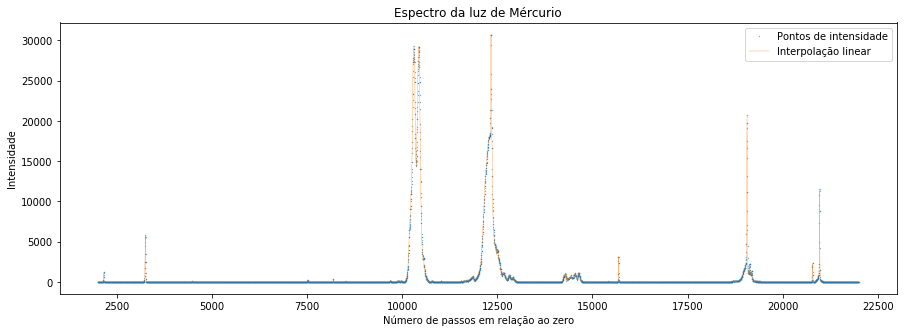

In [2]:
# Dependências
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig
import scipy.optimize as opt
import os
plt.rcParams["figure.figsize"] = (15, 5)

# Caminho para o arquivo.csv com os dados
data_path = os.path.expanduser("~/shared/Lab5_GD18/Exp3_Sem1/calibracao_2.csv")

# Carregar os dados
data = pd.read_csv(data_path, delimiter=";")
X = data.Passo
Y = data.Intensidade

# Exibir os resultados
plt.plot(X, Y, '.', markersize=0.5, label="Pontos de intensidade")
plt.plot(X, Y, '-', linewidth=0.3, label="Interpolação linear")
plt.title("Espectro da luz de Mércurio")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

## Análise

Para a obtenção dos picos, utilizamos de uma função embutida no pacote scipy que leva em consideração a derivada da vizinhança dos pontos para a detecção de candidatos a picos para posterior seleção utilizando-se de critérios como a promeniência do pico, a distance entre os picos vizinhos e a largura do pico.

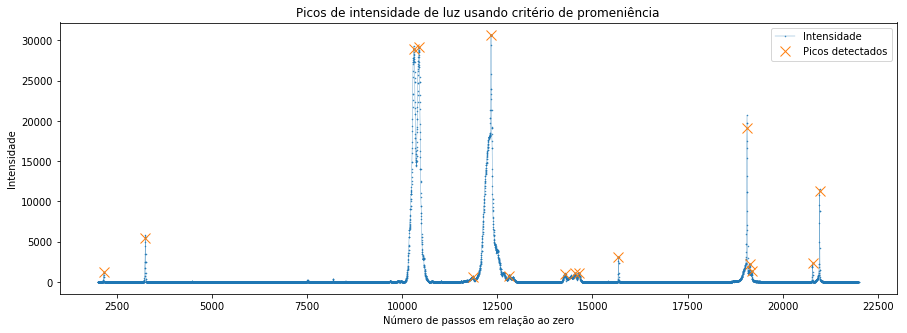

In [3]:
# Aquisição de picos pela promeniência

n = 2
Yp = Y
Xp = X.rolling(n).max()[n:]
Yp = Y.rolling(n).max()[n:]
i_peaks = sig.find_peaks(Yp, prominence=400, distance=20, width=5)[0]
X_peaks = X[i_peaks + n/2]
Y_peaks = Y[i_peaks + n/2]
plt.plot(X, Y, '.-', linewidth=0.3, markersize=1)
plt.plot(X_peaks, Y_peaks, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

In [4]:
for peak in i_peaks:
    print_text = "Pico no passo {} com intensidade {}".format(X[peak], Y[peak])
    print(print_text)

Pico no passo 2156 com intensidade 1065
Pico no passo 3248 com intensidade 4949
Pico no passo 10304 com intensidade 28945
Pico no passo 10434 com intensidade 29069
Pico no passo 11856 com intensidade 645
Pico no passo 12332 com intensidade 30696
Pico no passo 12816 com intensidade 751
Pico no passo 14282 com intensidade 918
Pico no passo 14544 com intensidade 910
Pico no passo 14640 com intensidade 1072
Pico no passo 15684 com intensidade 3095
Pico no passo 19060 com intensidade 17496
Pico no passo 19128 com intensidade 2203
Pico no passo 19180 com intensidade 1212
Pico no passo 20784 com intensidade 2166
Pico no passo 20968 com intensidade 10781


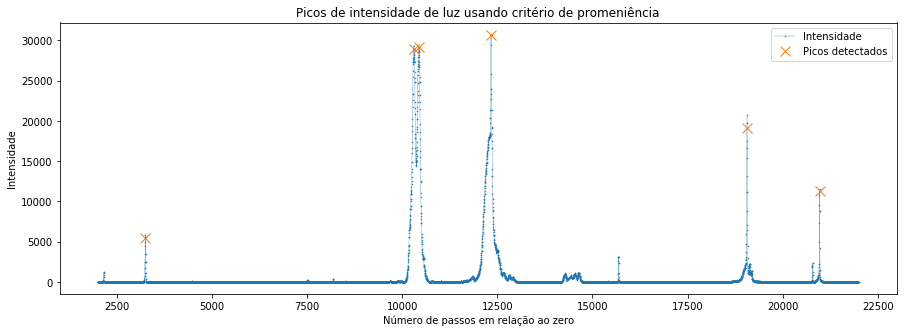

In [5]:
# Aquisição de picos pela promeniência

n = 2
Yp = Y
Xp = X.rolling(n).max()[n:]
Yp = Y.rolling(n).max()[n:]
i_peaks = sig.find_peaks(Yp, prominence=400, distance=20, width=5)[0]
X_peaks = X[i_peaks + n/2]
Y_peaks = Y[i_peaks + n/2]

inds = Y_peaks > 4000
X_peaks = X_peaks[inds]
Y_peaks = Y_peaks[inds]

plt.plot(X, Y, '.-', linewidth=0.3, markersize=1)
plt.plot(X_peaks, Y_peaks, 'x', markersize=10, label="Picos detectados")
plt.title("Picos de intensidade de luz usando critério de promeniência")
plt.ylabel("Intensidade")
plt.xlabel("Número de passos em relação ao zero")
plt.legend()
plt.show()

In [6]:
comprimento_ondas = np.array([6716, 5750, 5770, 5461, 4345, 4080])


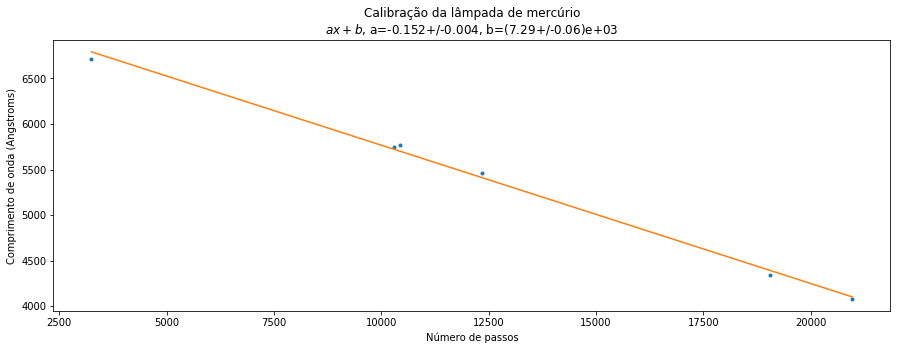

In [8]:
import scipy.optimize as opt
import uncertainties as unc
x = X_peaks.values
y = comprimento_ondas
cf = opt.curve_fit(lambda x, a, b: a * x + b, x, y)

(a, b) = unc.correlated_values(cf[0], cf[1])
title_text = "Calibração da lâmpada de mercúrio"
title_text += "\n"
title_text += r"$ax + b$, a={}, b={}".format(a, b)


plt.plot(x, y, '.')
plt.plot(x, x * a.n + b.n)
plt.title(title_text)
plt.ylabel("Comprimento de onda (Angstroms)")
plt.xlabel("Número de passos")
plt.show()

NameError: name 'X_peaks_a' is not defined

In [11]:
cf[0]

array([-1.51824081e-01,  7.28583053e+03])